### Step1 : Importing the libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Step2: Reading and understanding the data

In [3]:
# Reading the data from csv file

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Checking for any null values in columns



In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No null values are found in the columns

In [8]:
# print the number of unique values in the columns
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Step3 : Cleaning the data

#### Dropping columns that are not going to be useful analysis:
* Instant is the index column or row identifier hence not useful in analysis
* dteday is the date column, as we have columns such as mnth, yr and weekday already, date column will not be useful and also are not considering day to day trend in demand for bikes
* casual and registered columns describe the target variable cnt as cnt = casual + registered hence we need to drop these two columns
 

In [9]:
df.drop(['instant','dteday','casual','registered'],inplace=True, axis=1)

In [10]:
df.shape

(730, 12)

#### Renaming some columns for better understanding

In [11]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [12]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

#### Converting the below columns to categorical for EDA and better understanding

In [13]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [15]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
df.weathersit = df.weathersit.map({1:'clear',2:'misty',3:'snowy',4:'rainy'})

In [17]:
df.year = df.year.map({0:2018,1:2019})

In [18]:
df.head(5)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 4: EDA

#### Segregating the numerical and categorical columns for EDA

In [20]:
num_cols=["humidity","temp","atemp","windspeed","cnt"]
cat_cols=['season', 'month', 'weekday', 'weathersit','year','holiday','workingday']

#### Drawing pairplots for numerical variables to check linear relationship

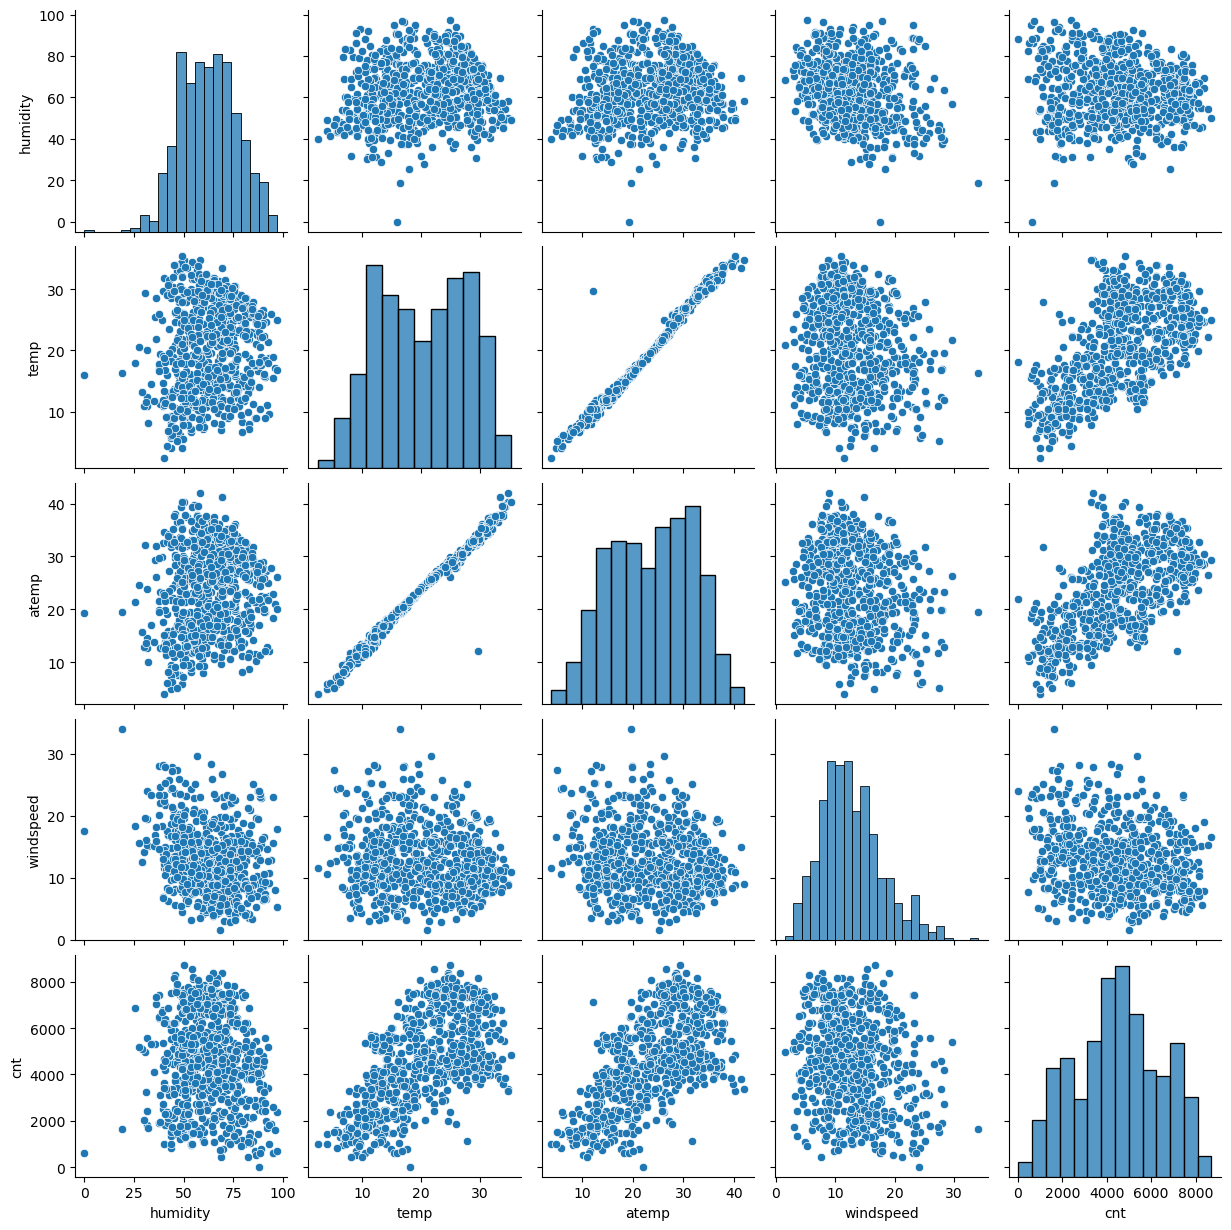

In [21]:
sns.pairplot(data=df,vars=num_cols)
plt.show()

#### Creating correlation matrix to check correlation between numerical variables

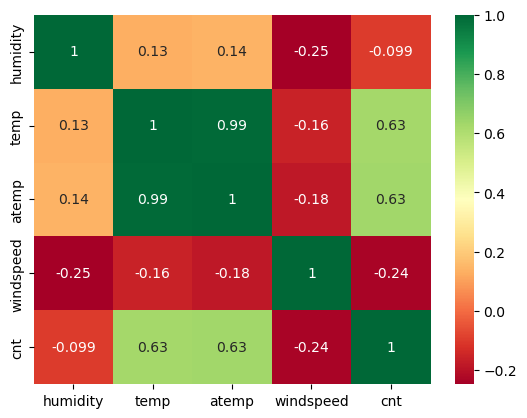

In [22]:
sns.heatmap(df[num_cols].corr(), cmap='RdYlGn', annot = True)
plt.show()

### Observations:
 * Variables temp and atemp have the highest correlation with target variable cnt
 * temp and atemp are highly correlated to each other

#### creating boxplots between target variable cnt and categorical variables

In [23]:
#common function for boxplot of categorical variables
def categorical_box_plots(variable):
    i=1
    plt.figure(figsize=(10,4))  
    sns.boxplot(data=df, x=variable, y='cnt')  
    plt.show()

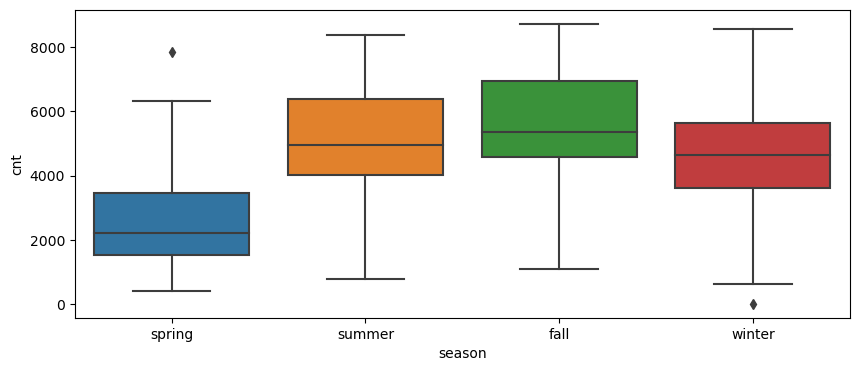

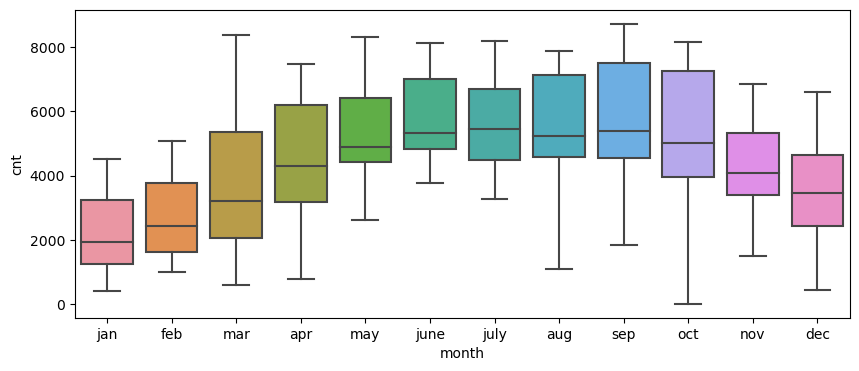

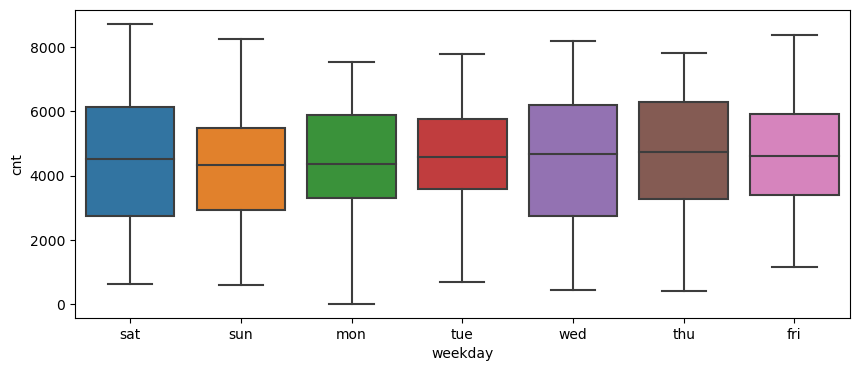

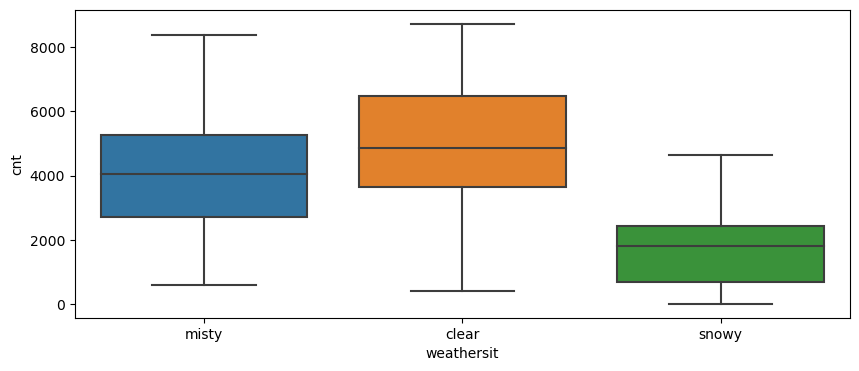

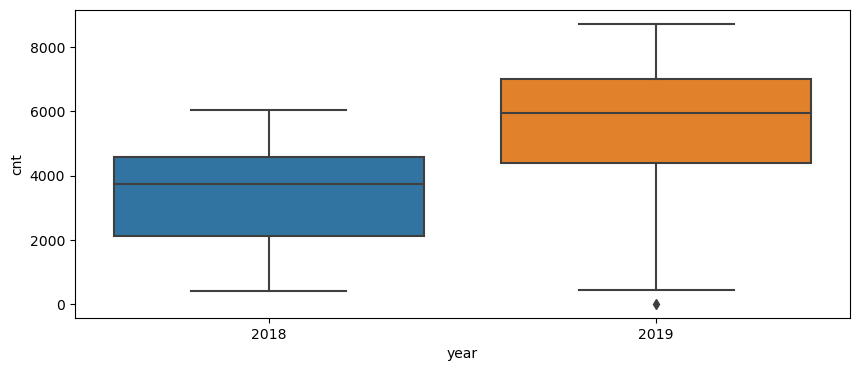

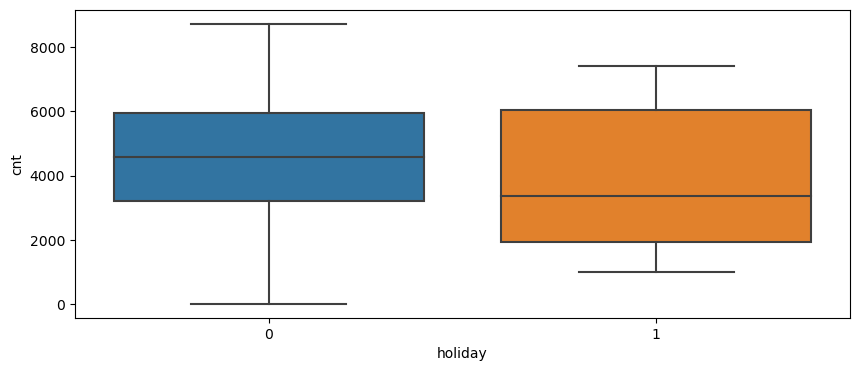

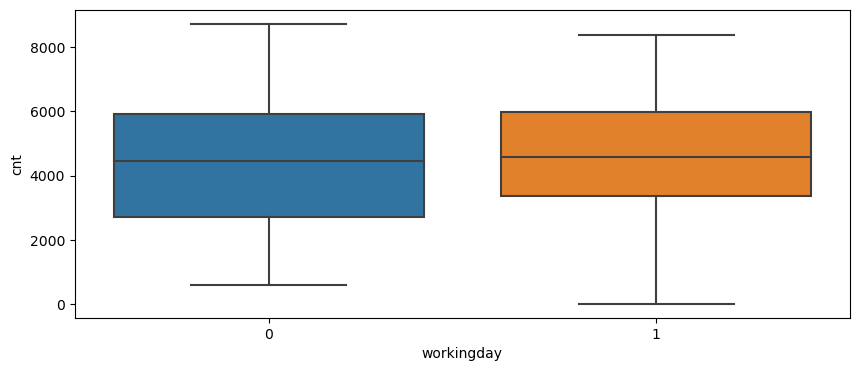

In [24]:
for var in cat_cols:
    categorical_box_plots(var)


In [25]:
# function to create barplot related to categorical columns

def categorical_bar_plots(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x = column,y ='cnt',data=df, hue= 'year')  
    plt.show()

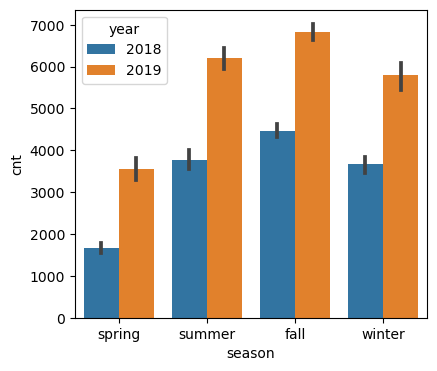

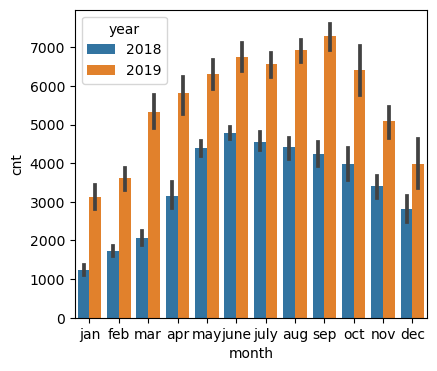

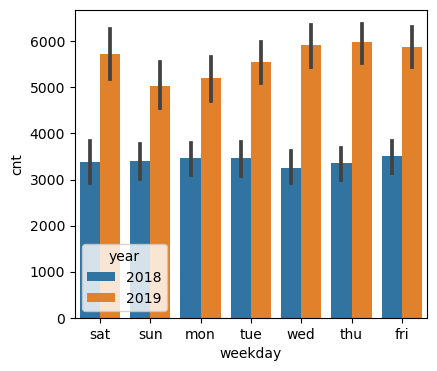

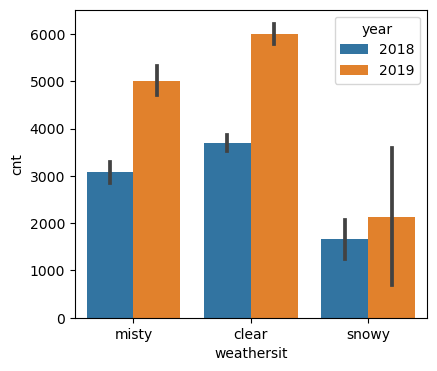

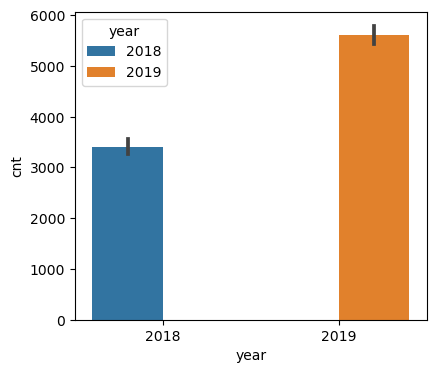

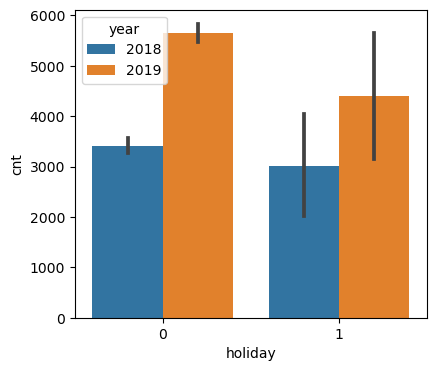

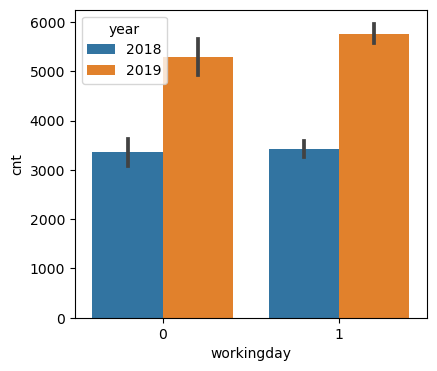

In [26]:
for var in cat_cols:
    categorical_bar_plots(var)

### Observations

* Fall season has the highest number of bookings
* Year 2019 has more bookings than 2018
* Demand is growing from June to September, after that there is a decrease in demand
* Demand has increased on a holiday
* When the weather is good and clear the demand is higher
* Weekday is not giving much insight about the demand


## Step 5: Data preparation for multiple linear regression

In [27]:
#mapping year column back to binary 0 and 1 before modeling
df.year = df.year.map({2018: 0, 2019:1})

#### Creating dummy variable for categorical non binary variables.

In [28]:
df_months=pd.get_dummies(df["month"],drop_first=True, dtype=int)
df_weekdays=pd.get_dummies(df["weekday"],drop_first=True, dtype=int)
df_weathersit=pd.get_dummies(df["weathersit"],drop_first=True, dtype=int)
df_seasons=pd.get_dummies(df["season"],drop_first=True, dtype=int)

In [29]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Merging the dummy variable dataframes with the main data frame

In [30]:
df_model = pd.concat([df,df_months,df_weekdays,df_weathersit,df_seasons],axis=1)

In [31]:
df_model.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,misty,snowy,spring,summer,winter
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [32]:
df_model.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'misty', 'snowy', 'spring',
       'summer', 'winter'],
      dtype='object')

#### Dropping the below columns as they are no longer required as dummy variables are already created for them


In [33]:
df_model.drop(['month','weekday','weathersit','season'], axis = 1, inplace = True)

In [34]:
df_model.shape

(730, 30)

In [35]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    int32  
 9   dec         730 non-null    int32  
 10  feb         730 non-null    int32  
 11  jan         730 non-null    int32  
 12  july        730 non-null    int32  
 13  june        730 non-null    int32  
 14  mar         730 non-null    int32  
 15  may         730 non-null    int32  
 16  nov         730 non-null    int32  
 17  oct         730 non-null    int32  
 18  sep         730 non-null    int32  
 19  mon         730 non-null    i

In [36]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 6: Split the data into training and test sets

In [37]:
np.random.seed(0)
df_train, df_test = train_test_split(df_model, train_size = 0.7, random_state = 100)

In [38]:
df_train.shape

(510, 30)

In [39]:
df_test.shape

(220, 30)

## Step 7: Rescaling the features

#### We shall use min max scaling on the continuous variables

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaling to all the columns except the binary and 'dummy' variables

In [42]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,misty,snowy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [44]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,misty,snowy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 8: Model building 

#### Using automated RFE approach to eliminate some columns as we have many columns. Here we are selecting 15 features using RFE

In [45]:
#building the linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
## Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [47]:
#list of top 15 features selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('misty', True, 1),
 ('snowy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [48]:
#filtering X_train with columns selected by RFE and storing it into list col
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'misty', 'snowy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [49]:
#checking the columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [50]:
#common function for calculating VIF of features
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building a linear model:

In [52]:
#building first linear regression model
X_train_lm1 = sm.add_constant(X_train_rfe)
model1 = sm.OLS(y_train,X_train_lm1).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        17:13:26   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [53]:
VIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,humidity,1.91
10,misty,1.57


In [54]:
### Variable holiday has high P value of 0.386. So lets drop this variable.
X_train_rfe.drop(['holiday'], axis = 1, inplace=True)

In [55]:
## Building 2nd linear regression model

X_train_lm2 = sm.add_constant(X_train_rfe)
model2 = sm.OLS(y_train,X_train_lm2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        17:13:26   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

In [56]:
VIF(X_train_rfe)

,Features,VIF
3,humidity,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
7,sat,4.91
11,spring,4.80
8,sun,4.76
13,winter,3.69
12,summer,3.04
9,misty,2.31


In [57]:
## dropping the sun variable as p-value is considerably high at 0.029.
X_train_rfe.drop(['sun'], axis = 1, inplace=True)

In [58]:
## Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_rfe)
model3 = sm.OLS(y_train,X_train_lm_3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.54e-191
Time:                        17:13:26   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

In [59]:
VIF(X_train_rfe)

,Features,VIF
3,humidity,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
10,spring,4.18
12,winter,3.39
11,summer,2.84
8,misty,2.28
0,year,2.08
7,sat,1.84


In [60]:
# the p values for variable 'spring' is considerably higher than others , hence dropping it
X_train_rfe.drop(['spring'], axis = 1, inplace=True)

In [61]:
## Building 4th linear regression model
X_train_lm_4 = sm.add_constant(X_train_rfe)
model4 = sm.OLS(y_train,X_train_lm_4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.14e-191
Time:                        17:13:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.0

In [62]:
VIF(X_train_rfe)

,Features,VIF
3,humidity,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
8,misty,2.10
0,year,2.03
7,sat,1.79
10,summer,1.76
11,winter,1.70
5,july,1.55


In [63]:
#feature july has high p value compared to others hence dropping it
X_train_rfe.drop(['july'], axis = 1, inplace=True)

In [64]:
## Building 5th linear regression model
X_train_lm_5 = sm.add_constant(X_train_rfe)
model5 = sm.OLS(y_train,X_train_lm_5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.10e-191
Time:                        17:13:26   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.029      5.960      0.0

In [65]:
VIF(X_train_rfe)

,Features,VIF
3,humidity,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
7,misty,2.10
0,year,2.02
6,sat,1.79
10,winter,1.66
9,summer,1.58
5,sep,1.20


In [66]:
# the pvalues of all the features is almost 0 now, however the VIF of "Humidity" is very high, hence dropping it
X_train_rfe.drop(['humidity'], axis = 1, inplace=True)

In [67]:
## Building 6th linear regression model
X_train_lm_6 = sm.add_constant(X_train_rfe)
model6 = sm.OLS(y_train,X_train_lm_6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.13e-188
Time:                        17:13:26   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

In [68]:
VIF(X_train_rfe)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
5,sat,1.69
8,summer,1.57
6,misty,1.53
9,winter,1.40
4,sep,1.20
7,snowy,1.08


We can see that now all p values of features is 0 which is significant and also vif of each feature is less than 5. Also R squared and F statistic of model 6 is pretty good. Therefore finalizing this model. Below are the model 6 features and their coefficients

In [69]:
model6.params

const         0.075009
year          0.233139
workingday    0.056117
temp          0.549892
windspeed    -0.155203
sep           0.097365
sat           0.067500
misty        -0.080022
snowy        -0.287090
summer        0.088621
winter        0.130655
dtype: float64

## Step 9: Residual Analysis of the train data

In [70]:
X_train_lm_6

,const,year,workingday,temp,windspeed,sep,sat,misty,snowy,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,0,1,0


In [71]:
y_train_pred = model6.predict(X_train_lm_6)

#### Plot Histogram of error terms 

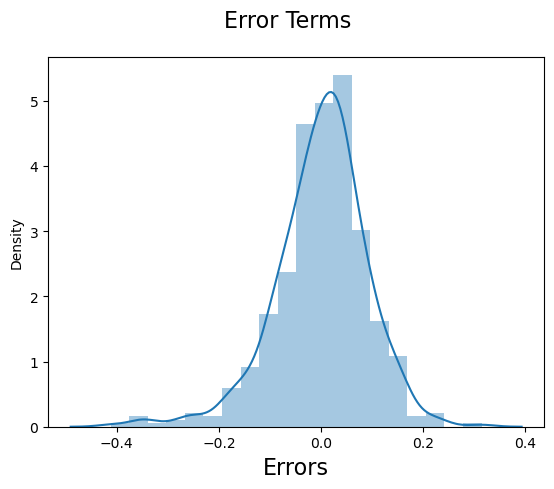

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 16) 
plt.xlabel('Errors', fontsize = 16)
plt.show()

Error terms are following normal distribution as can be seen in the above plot

#### Check for Multicollinearity

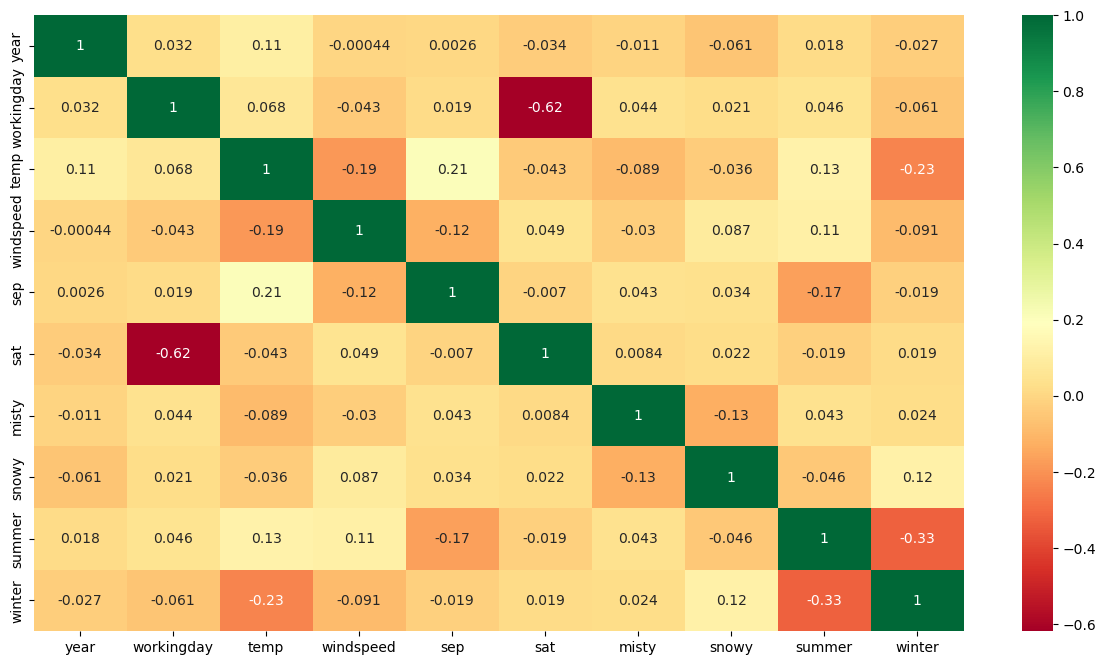

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

No multicollinearity is seen in the above heatmap

#### Error terms have constant variance (homoscedasticity)

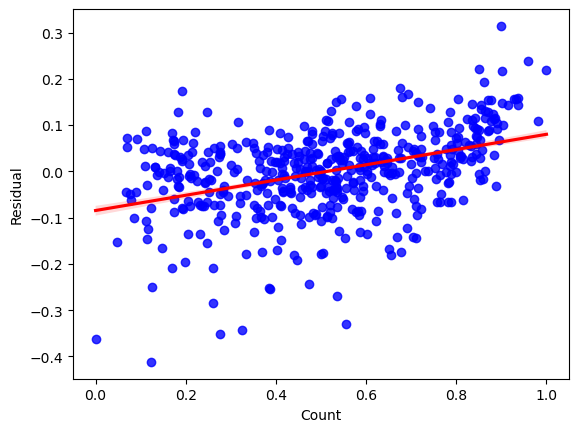

In [74]:
residual = y_train - y_train_pred
sns.regplot(x=y_train, y=residual, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Step 10: Making predictions using the final model

In [75]:
num_vars = ['temp', 'atemp', 'humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,misty,snowy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,misty,snowy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
# Now let's use our model to make predictions.
# Adding constant variable to test dataframe

X_test= X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test)

In [79]:
X_test_new

,const,year,workingday,temp,windspeed,sep,sat,misty,snowy,summer,winter
184,1.0,0,0,0.831783,0.084219,0,0,1,0,0,0
535,1.0,1,1,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,1,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.519232,0.283397,0,0,0,0,0,1
127,1.0,0,0,0.584649,0.069510,0,0,0,0,1,0
640,1.0,1,1,0.745598,0.052115,0,0,1,0,0,1
72,1.0,0,1,0.331557,0.203418,0,0,0,0,0,0


In [80]:
y_pred = model6.predict(X_test_new)

In [81]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

## Step 11 : Model Evaluation

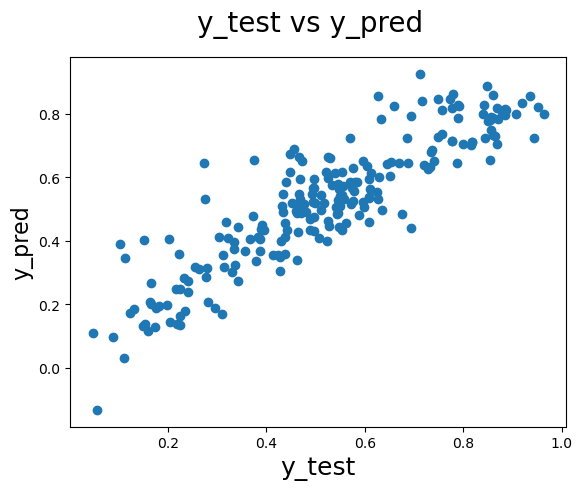

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [83]:
round(model6.params,4)

const         0.0750
year          0.2331
workingday    0.0561
temp          0.5499
windspeed    -0.1552
sep           0.0974
sat           0.0675
misty        -0.0800
snowy        -0.2871
summer        0.0886
winter        0.1307
dtype: float64

The equation of our best fitted line as per the variables and their coefficients above is:

$ cnt = 0.0750 + 0.2331 \times  year + 0.5499 \times temp - 0.1552 \times windspeed + 0.0974 \times sep + 0.0675 \times sat - 0.0800 \times misty - 0.2871 \times snowy + 0.0886 \times summer + 0.1307 \times winter $

In [84]:
#calculating the value of adjusted R square for test dataset

adjusted_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(adjusted_r2)

0.7854


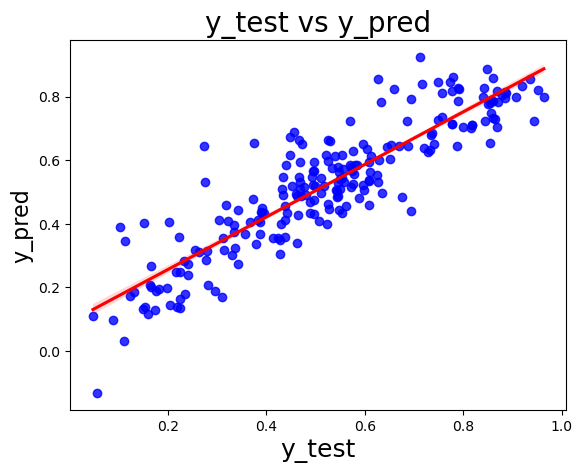

In [85]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
- Train dataset R squared         : 0.835
- Test dataset R squared          : 0.796
- Train dataset Adjusted R square : 0.832  
- Test dataset Adjusted R square  : 0.785


## Interpretation of results

### Analysing the above model, the bike sharing company should focus on the following features:

* Company should focus on expanding the business in the month of September
* There will be increase in demand or boom in sales once the pandemic is over based on the previous data
* There would be  less bookings in snowy, misty or cloudy weather
* Temperature is an important feature and with unit increase in temperature bike demand is expected to rise by 0.554 times
* Very high wind speed will lead to decline in bike demand

### Conclusion

Significant variables to predict the demand of shared bikes:

* temp
* year
* windspeed
* summer
* winter
* saturday
* september
* snowy weather (Light Snow, Light Rain)
* misty weather (Mist + Cloudy)